In [1]:
!pip install tensorflow_model_optimization

import numpy as np
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, datasets, utils, callbacks, optimizers, losses
from keras.datasets import cifar10
import tensorflow_model_optimization as tfmot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 4.8 MB/s eta 0:00:00


In [2]:
# Loading data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Data Transform
x_train = x_train.astype(np.float32) / 255.0
y_train = utils.to_categorical(y_train)
x_train_mean = np.mean(x_train, axis=0)
x_train -= x_train_mean

x_test = x_test.astype(np.float32) / 255.0
y_test = utils.to_categorical(y_test)
x_test -= x_train_mean

170498071/170498071 [==============================] - 4s 0us/step


In [4]:
# Connect to google drive to save/load model
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### ResNet18

In [38]:
# @title 기본 제목 텍스트
kernel_initializer = 'he_normal'
input_shape = (32,32,3)

image_input = layers.Input(shape=input_shape)
# first layer

block1 = keras.Sequential([
    layers.Conv2D(kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer=kernel_initializer),
    layers.BatchNormalization(),
    layers.ReLU()
])(image_input)

# first stage
shortcut = block1
block2 = keras.Sequential([
    layers.Conv2D(filters=64, kernel_size=3, strides=1, padding='same', kernel_initializer=kernel_initializer),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Conv2D(filters=64, kernel_size=3, strides=1, padding='same', kernel_initializer=kernel_initializer),
    layers.BatchNormalization()
])(block1)

block2 = layers.add([block2, shortcut])
block2 = layers.ReLU()(block2)

shortcut = block2
block3 = keras.Sequential([
    layers.Conv2D(filters=64, kernel_size=3, strides=1, padding='same', kernel_initializer=kernel_initializer),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Conv2D(filters=64, kernel_size=3, strides=1, padding='same', kernel_initializer=kernel_initializer),
    layers.BatchNormalization()
])(block2)

block3 = layers.add([block3, shortcut])
block3 = layers.ReLU()(block3)

# second stage
shortcut = keras.Sequential([layers.Conv2D(filters=128, kernel_size=1, strides=2),
                             layers.BatchNormalization()])(block3)
block4 = keras.Sequential([
    layers.Conv2D(filters=128, kernel_size=3, strides=2, padding='same', kernel_initializer=kernel_initializer),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Conv2D(filters=128, kernel_size=3, strides=1, padding='same', kernel_initializer=kernel_initializer),
    layers.BatchNormalization()
])(block3)

block4 = layers.add([block4, shortcut])
block4 = layers.ReLU()(block4)

shortcut = block4
block5 = keras.Sequential([
    layers.Conv2D(filters=128, kernel_size=3, strides=1, padding='same', kernel_initializer=kernel_initializer),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Conv2D(filters=128, kernel_size=3, strides=1, padding='same', kernel_initializer=kernel_initializer),
    layers.BatchNormalization()
])(block4)

block5 = layers.add([block5, shortcut])
block5 = layers.ReLU()(block5)

# third stage
shortcut = keras.Sequential([layers.Conv2D(filters=256, kernel_size=1, strides=2),
                             layers.BatchNormalization()])(block5)
block6 = keras.Sequential([
    layers.Conv2D(filters=256, kernel_size=3, strides=2, padding='same', kernel_initializer=kernel_initializer),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Conv2D(filters=256, kernel_size=3, strides=1, padding='same', kernel_initializer=kernel_initializer),
    layers.BatchNormalization()
])(block5)

block6 = layers.add([block6, shortcut])
block6 = layers.ReLU()(block6)

shortcut = block6
block7 = keras.Sequential([
    layers.Conv2D(filters=256, kernel_size=3, strides=1, padding='same', kernel_initializer=kernel_initializer),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Conv2D(filters=256, kernel_size=3, strides=1, padding='same', kernel_initializer=kernel_initializer),
    layers.BatchNormalization()
])(block6)

block7 = layers.add([block7, shortcut])
block7 = layers.ReLU()(block7)

#fourth stage
shortcut = keras.Sequential([layers.Conv2D(filters=512, kernel_size=1, strides=2),
                             layers.BatchNormalization()])(block7)
block8 = keras.Sequential([
    layers.Conv2D(filters=512, kernel_size=3, strides=2, padding='same', kernel_initializer=kernel_initializer),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Conv2D(filters=512, kernel_size=3, strides=1, padding='same', kernel_initializer=kernel_initializer),
    layers.BatchNormalization()
])(block7)

block8 = layers.add([block8, shortcut])
block8 = layers.ReLU()(block8)

shortcut = block8
block9 = keras.Sequential([
    layers.Conv2D(filters=512, kernel_size=3, strides=1, padding='same', kernel_initializer=kernel_initializer),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Conv2D(filters=512, kernel_size=3, strides=1, padding='same', kernel_initializer=kernel_initializer),
    layers.BatchNormalization()
])(block8)

block9 = layers.add([block9, shortcut])
block9 = layers.ReLU()(block9)

predictions = keras.Sequential([
    layers.GlobalAveragePooling2D(),
    layers.Flatten(),
    layers.Dense(10)
])(block9)

model = keras.Model(inputs=image_input, outputs=predictions)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 sequential_2 (Sequential)   (None, 32, 32, 64)           2048      ['input_2[0][0]']             
                                                                                                  
 sequential_3 (Sequential)   (None, 32, 32, 64)           74368     ['sequential_2[0][0]']        
                                                                                                  
 add_8 (Add)                 (None, 32, 32, 64)           0         ['sequential_3[0][0]',        
                                                                     'sequential_2[0][0]']  

In [3]:
## Applying bottleneck
def bottleneck_block(input, filters=64, expansion=1, stride=1):
    x = layers.Conv2D(filters, (1, 1), padding='same')(input)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # x = layers.Conv2D(filters, (3, 3), padding='same', strides=stride)(x)
    x = layers.DepthwiseConv2D(3, padding='same', strides=stride)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.Conv2D(filters*expansion, (1, 1), padding='same')(x)
    x = layers.BatchNormalization()(x)

    if (stride == 2 or expansion==4):
        input = layers.Conv2D(filters*expansion, (1, 1), padding='same', strides=stride)(input)
        input = layers.BatchNormalization()(input)

    x = layers.Add()([x, input])
    x = layers.ReLU()(x)
    return x

kernel_initializer = 'he_normal'
input_shape = (32,32,3)

image_input = layers.Input(shape=input_shape)
# first layer
x = keras.Sequential([
    layers.Conv2D(kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer=kernel_initializer),
    layers.BatchNormalization(),
    layers.ReLU()
])(image_input)

# first stage
x = bottleneck_block(x, filters=64, expansion=1, stride=1)
x = bottleneck_block(x, filters=64, expansion=1, stride=1)
# second stage
x = bottleneck_block(x, filters=128, expansion=1, stride=2)
x = bottleneck_block(x, filters=128, expansion=1, stride=1)
# Third stage
x = bottleneck_block(x, filters=256, expansion=1, stride=2)
x = bottleneck_block(x, filters=256, expansion=1, stride=1)
# Fourth stage
x = bottleneck_block(x, filters=512, expansion=1, stride=2)
x = bottleneck_block(x, filters=512, expansion=1, stride=1)

predictions = keras.Sequential([
    layers.GlobalAveragePooling2D(),
    layers.Flatten(),
    layers.Dense(512),
    layers.Dense(10)
])(x)

model = keras.Model(inputs=image_input, outputs=predictions)

# Total parameters
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 sequential (Sequential)     (None, 32, 32, 64)           2048      ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 32, 32, 64)           4160      ['sequential[0][0]']          
                                                                                                  
 batch_normalization_1 (Bat  (None, 32, 32, 64)           256       ['conv2d_1[0][0]']            
 chNormalization)                                                                             

In [30]:
# from keras.callbacks import EarlyStopping
# early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 30, mode = 'auto')
from keras.callbacks import ModelCheckpoint

save_dir = './drive/MyDrive/colab_data/'
checkpoint = ModelCheckpoint(save_dir+"best_model", monitor="val_accuracy", save_best_only=True, mode='auto')
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

hist = model.fit(
          x_train,
          y_train,
          epochs=50,
          validation_split=0.1,
          callbacks = [checkpoint])

# Best Validation Accuracy
print("Best Validation Accuracy:{:.4f}".format(max(hist.history['val_accuracy'])))

Epoch 1/50
1407/1407 [==============================] - 77s 44ms/step - loss: 0.5627 - accuracy: 0.8055 - val_loss: 0.7272 - val_accuracy: 0.7636
Epoch 2/50
1407/1407 [==============================] - 55s 39ms/step - loss: 0.4615 - accuracy: 0.8372 - val_loss: 0.6195 - val_accuracy: 0.8000
Epoch 3/50
1407/1407 [==============================] - 45s 32ms/step - loss: 0.3787 - accuracy: 0.8665 - val_loss: 0.8826 - val_accuracy: 0.7554
Epoch 4/50
1407/1407 [==============================] - 55s 39ms/step - loss: 0.3166 - accuracy: 0.8884 - val_loss: 0.5629 - val_accuracy: 0.8194
Epoch 5/50
1407/1407 [==============================] - 43s 30ms/step - loss: 0.2646 - accuracy: 0.9065 - val_loss: 0.7226 - val_accuracy: 0.7896
Epoch 6/50
1407/1407 [==============================] - 42s 30ms/step - loss: 0.2197 - accuracy: 0.9234 - val_loss: 0.6045 - val_accuracy: 0.8174
Epoch 7/50
1407/1407 [==============================] - 42s 30ms/step - loss: 0.1874 - accuracy: 0.9356 - val_loss: 0.6748 -

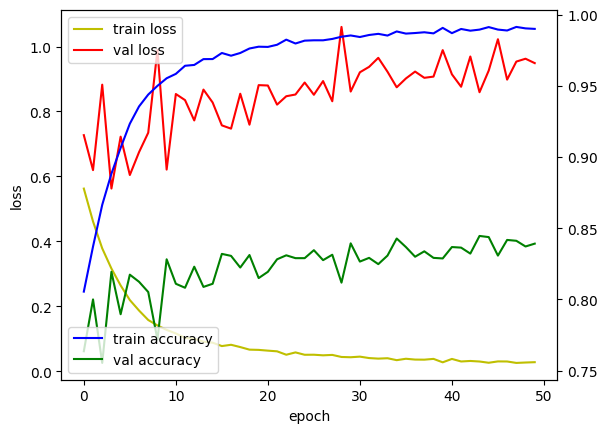

In [31]:
#plot training
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label = 'train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label = 'val loss')
acc_ax.plot(hist.history['accuracy'], 'b', label = 'train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label = 'val accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_xlabel('accuracy')

loss_ax.legend(loc = 'upper left')
acc_ax.legend(loc = 'lower left')

plt.show()

In [ ]:
load_dir = './drive/MyDrive/colab_data/'
model_best = keras.models.load_model(load_dir+'best_model')

In [39]:
# from tensorflow import keras
# import tensorflow as tf
# import tensorflow_model_optimization as tfmot


prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude

# Compute end step to finish pruning after 2 epochs.
batch_size = 32
epochs = 20
validation_split = 0.1 # 10% of training set will be used for validation set.

num_images = x_train.shape[0] * (1 - validation_split)
end_step = np.ceil(num_images / batch_size).astype(np.int32) * epochs

# Define model for pruning.
pruning_params = {
      'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(initial_sparsity=0.50,
                                                               final_sparsity=0.80,
                                                               begin_step=0,
                                                               end_step=end_step)
}

model_for_pruning = prune_low_magnitude(model_best, **pruning_params)

# `prune_low_magnitude` requires a recompile.
model_for_pruning.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

checkpoint = ModelCheckpoint(save_dir+"pruned_model", monitor="val_accuracy", save_best_only=True, mode='auto')

save_dir = './drive/MyDrive/colab_data/'
callbacks = [
  tfmot.sparsity.keras.UpdatePruningStep(),
  tfmot.sparsity.keras.PruningSummaries(log_dir=save_dir),
  checkpoint
]

hist_prune = model_for_pruning.fit(x_train, y_train,
                  batch_size = batch_size,
                  epochs=epochs, validation_split=validation_split,
                  callbacks=callbacks)

# Best Validation Accuracy
print("Best Validation Accuracy(Prunned):{:.4f}".format(max(hist_prune.history['val_accuracy'])))

Epoch 1/20
   6/1407 [..............................] - ETA: 1:28 - loss: 0.0016 - accuracy: 1.0000

1407/1407 [==============================] - 116s 58ms/step - loss: 0.0320 - accuracy: 0.9888 - val_loss: 0.8536 - val_accuracy: 0.8402
Epoch 2/20
1407/1407 [==============================] - 79s 56ms/step - loss: 0.0218 - accuracy: 0.9926 - val_loss: 0.8669 - val_accuracy: 0.8442
Epoch 3/20
1407/1407 [==============================] - 79s 56ms/step - loss: 0.0277 - accuracy: 0.9900 - val_loss: 0.9171 - val_accuracy: 0.8410
Epoch 4/20
1407/1407 [==============================] - 84s 59ms/step - loss: 0.0267 - accuracy: 0.9912 - val_loss: 0.9606 - val_accuracy: 0.8360
Epoch 5/20
1407/1407 [==============================] - 78s 56ms/step - loss: 0.0249 - accuracy: 0.9915 - val_loss: 1.0510 - val_accuracy: 0.8274
Epoch 6/20
1407/1407 [==============================] - 78s 55ms/step - loss: 0.0296 - accuracy: 0.9893 - val_loss: 0.9486 - val_accuracy: 0.8370
Epoch 7/20
1407/1407 [==============================] - 79s 56ms/step - loss: 0.0267 - accuracy: 0.9907 - val_loss: 0.8862 - val_accur

FailedPreconditionError: ignored

In [37]:
# Total parameters after prune
load_dir = './drive/MyDrive/colab_data/'
pruned_model = tf.keras.models.load_model(load_dir+"pruned_model")

model_for_export = tfmot.sparsity.keras.strip_pruning(pruned_model)
model_for_export.summary()

pruned_weights = model_for_export.get_weights()

# print sparsity
total_count = 0
total_nonzero = 0

for i, weights in enumerate(pruned_weights):
    if len(weights) > 0:
        weight_matrix = np.array(weights[0])
        non_zero_count = np.count_nonzero(weight_matrix)
        layer_count = np.prod(weight_matrix.shape)
        sparsity = 1.0 - (non_zero_count / layer_count)
        # print(f"Layer {i:>2d}: Sparsity = {sparsity:.4f}")
        total_count = total_count + layer_count
        total_nonzero = total_nonzero + non_zero_count

total_sparsity = 1.0 - (total_nonzero / total_count)
print(f"Total Sparsity: {total_sparsity:.4f}")


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 sequential (Sequential)     (None, 32, 32, 64)           2048      ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 32, 32, 64)           4160      ['sequential[0][0]']          
                                                                                                  
 batch_normalization_1 (Bat  (None, 32, 32, 64)           256       ['conv2d_1[1][0]']            
 chNormalization)                                                                             

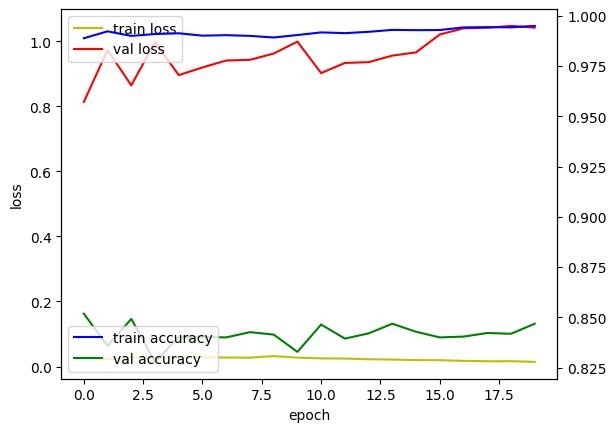

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist_prune.history['loss'], 'y', label = 'train loss')
loss_ax.plot(hist_prune.history['val_loss'], 'r', label = 'val loss')
acc_ax.plot(hist_prune.history['accuracy'], 'b', label = 'train accuracy')
acc_ax.plot(hist_prune.history['val_accuracy'], 'g', label = 'val accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_xlabel('accuracy')

loss_ax.legend(loc = 'upper left')
acc_ax.legend(loc = 'lower left')

plt.show()